In [31]:
#we will now deal with color data using CIFAR-10 Dataset
#CIFAR 10 dataset are 32 by 32 images of 10 different objects --> Airplane, Car. Bird, Deer, Dog, Frog, Horse, Ship, Truck
#These are color images
#we will be using a lot fo previous CNN code, so we will focus on new additions due to the introduction of 3 color channels(RGB)

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
from tensorflow.keras.datasets import cifar10

In [34]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [35]:
x_train.shape

(50000, 32, 32, 3)

In [36]:
x_train[0].shape

(32, 32, 3)

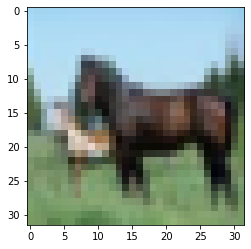

In [37]:
plt.imshow(x_train[12])

In [38]:
x_train[0].max()

255

In [39]:
x_train[0].min()

0

In [40]:
#image pre-processing
x_train=x_train/255
x_test=x_test/255

In [41]:
x_test.shape

(10000, 32, 32, 3)

In [42]:
y_test
#we want these labels to not to be continuous values but categorical values,as follows

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [45]:
y_train[0]

array([6], dtype=uint8)

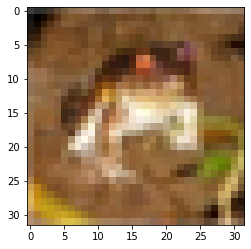

In [46]:
plt.imshow(x_train[0])
#check cifar 10 label names on google. Here it looks like 6 represents frog

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [48]:
32*32*3   #total number of values in cifar10 dataset (color image). 28*28=748-->in mnist dataset

3072

In [49]:
model=Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#since our image has more datapoints this time around it makes sense that we add more convolutional and pooling layers

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [53]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 190s 4ms/sample - loss: 1.4899 - accuracy: 0.4610 - val_loss: 1.2596 - val_accuracy: 0.5536
Epoch 2/15
50000/50000 [==============================] - 187s 4ms/sample - loss: 1.1508 - accuracy: 0.5957 - val_loss: 1.1119 - val_accuracy: 0.6053
Epoch 3/15
50000/50000 [==============================] - 186s 4ms/sample - loss: 0.9927 - accuracy: 0.6526 - val_loss: 1.0070 - val_accuracy: 0.6488
Epoch 4/15
50000/50000 [==============================] - 187s 4ms/sample - loss: 0.8716 - accuracy: 0.6956 - val_loss: 1.0320 - val_accuracy: 0.6428
Epoch 5/15
50000/50000 [==============================] - 186s 4ms/sample - loss: 0.7734 - accuracy: 0.7311 - val_loss: 0.9261 - val_accuracy: 0.6784
Epoch 6/15
50000/50000 [==============================] - 186s 4ms/sample - loss: 0.6886 - accuracy: 0.7618 - val_loss: 0.9295 - val_accuracy: 0.6832
Epoch 7/15
50000/50000 [==========================

In [54]:
metrics=pd.DataFrame(model.history.history)

In [55]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.489949,0.46104,1.259550,0.5536
1,1.150831,0.59566,1.111850,0.6053
2,0.992712,0.65264,1.007033,0.6488
3,0.871566,0.69558,1.031969,0.6428
4,0.773390,0.73112,0.926064,0.6784
5,0.688601,0.76178,0.929513,0.6832
6,0.612502,0.78686,0.979973,0.6788


<AxesSubplot:>

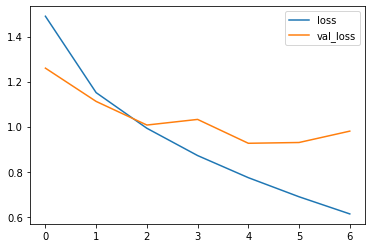

In [56]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

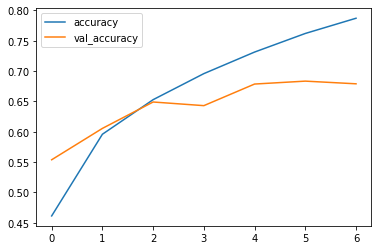

In [57]:
metrics[['accuracy','val_accuracy']].plot()

In [58]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 16s 2ms/sample - loss: 0.9800 - accuracy: 0.6788


[0.9799726202011109, 0.6788]

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
predictions=model.predict_classes(x_test)

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1000
           1       0.80      0.81      0.81      1000
           2       0.57      0.60      0.58      1000
           3       0.56      0.43      0.49      1000
           4       0.66      0.54      0.59      1000
           5       0.61      0.54      0.57      1000
           6       0.67      0.82      0.74      1000
           7       0.74      0.72      0.73      1000
           8       0.80      0.74      0.77      1000
           9       0.71      0.78      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



<AxesSubplot:>

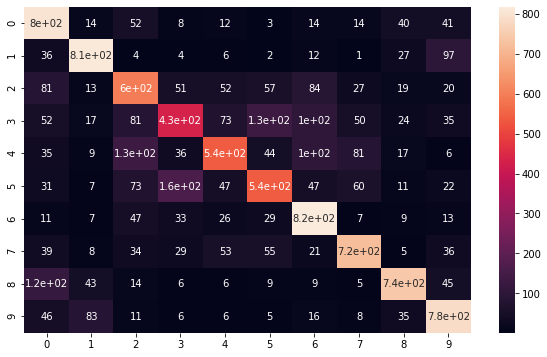

In [64]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [65]:
my_image=x_test[0]

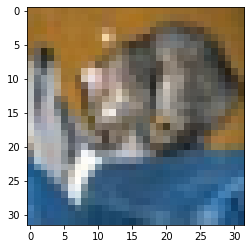

In [66]:
plt.imshow(my_image)

In [67]:
y_test[0] 

array([3], dtype=uint8)

In [69]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)